In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os

In [34]:

def get_metrics(filename) -> dict:
    f = open(filename)

    data = json.load(f)

    bsa = data["fish_stats"]["blind_spot_angle"]
    mna = data["fish_stats"]["max_noise_angle"]
    ts = data["fish_stats"]["turn_speed"]

    metrics = data["metrics"]

    df1=pd.concat([pd.DataFrame.from_dict(metrics,orient='index').transpose()] )
    df2=pd.concat([pd.DataFrame.from_dict(data["fish_stats"], orient='index').transpose()]* data["time_control"]["time_data"]["number_of_steps"], ignore_index=True)
    all_data = pd.concat([df1, df2], axis=1, join="inner")
    print(all_data.head())

    is_discrete_simulation = data["time_control"]["type"] == "discrete"

    amount_of_steps = 0
    time_step = 0
    if is_discrete_simulation:
        amount_of_steps = data["time_control"]["time_data"]["number_of_steps"]
        time_step = data["time_control"]["time_data"]["time_step"]  
        
    parsed_data = { "blind_spot_angle" : bsa, "max_noise_angle": mna, "turn_speed":ts, "blind_spot_angle_control" : bsa == 0, "max_noise_angle_control": mna == 0, "turn_speed_control":ts == 20}
    for metric_name in metrics.keys(): 
        #Takes the back half of the data since should have stablised
        metric_data = np.array(metrics[metric_name])
        avg = np.average(metric_data)
        std_dev = np.std(metric_data)

        parsed_data[metric_name + "_avg"] = avg
        parsed_data[metric_name + "_sd"] = std_dev 
    
    return (parsed_data, all_data)
    


In [35]:
from pathlib import Path

directory = Path("C:/Users/Aditha/AppData/Roaming/Godot/app_userdata/Fish Schools/e8")
master_data = []
data = []
for filename in os.listdir(directory):
    metrics = get_metrics(directory / filename)
    data.append(metrics[0])
    master_data.append(metrics[1])

df = pd.DataFrame(data)
master_pd = pd.concat(master_data)
master_pd.to_excel("master_data.xlsx")

readable_names = {
    "blind_spot_angle" : "Blind Spot Angle",
    "max_noise_angle" : "Max Noise Angle",
    "turn_speed" : "Turn Speed"
}
df

   avg_dist_to_com  global_vec_divergence  local_vec_divergence  \
0        373.79761                0.03716               0.58043   

   swirling_factor  attraction_scaling_factor  blind_spot_angle  \
0         0.338824                        1.0               0.0   

   max_noise_angle  move_speed    roa    roo   ror  turn_speed  
0              0.0       120.0  500.0  150.0  15.0       0.785  
   avg_dist_to_com  global_vec_divergence  local_vec_divergence  \
0       356.794453               0.006584              0.560885   

   swirling_factor  attraction_scaling_factor  blind_spot_angle  \
0         0.342787                        1.0               0.0   

   max_noise_angle  move_speed    roa    roo   ror  turn_speed  
0              0.0       120.0  500.0  150.0  15.0       2.785  
   avg_dist_to_com  global_vec_divergence  local_vec_divergence  \
0       363.664389                0.04996              0.594989   

   swirling_factor  attraction_scaling_factor  blind_spot_angle  

,blind_spot_angle,max_noise_angle,turn_speed,blind_spot_angle_control,max_noise_angle_control,turn_speed_control,avg_dist_to_com_avg,avg_dist_to_com_sd,global_vec_divergence_avg,global_vec_divergence_sd,local_vec_divergence_avg,local_vec_divergence_sd,swirling_factor_avg,swirling_factor_sd
0,0.000,0.00,0.785,True,True,False,258.902563,20.789116,0.039910,0.037262,0.826424,0.071884,0.567479,0.057262
1,0.000,0.00,2.785,True,True,False,158.575278,21.488834,0.049871,0.037409,0.649983,0.063276,0.423422,0.049530
2,0.000,0.00,4.785,True,True,False,136.660767,23.916212,0.087195,0.084242,0.566922,0.070465,0.390605,0.050210
3,0.000,0.00,6.785,True,True,False,128.278548,21.964240,0.105328,0.083040,0.546911,0.072079,0.395324,0.056424
4,0.000,0.00,20.000,True,True,True,125.418418,22.406701,0.103725,0.064596,0.533670,0.070891,0.398356,0.062073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5.890,0.00,6.785,False,True,False,354.505348,18.548668,0.050099,0.060710,0.530986,0.055881,0.187768,0.062336
116,5.890,0.00,4.785,False,True,False,363.673970,17.201520,0.053553,0.059622,0.542677,0.054468,0.217188,0.052887
117,5.890,0.00,2.785,False,True,False,388.666439,12.749198,0.040172,0.037894,0.568144,0.059417,0.242869,0.047550
118,5.890,0.00,0.785,False,True,False,433.165653,31.265388,0.059405,0.037365,0.631742,0.089486,0.323263,0.029608


In [ ]:
from matplotlib.pyplot import tight_layout


def draw_single_var_graphs(name):
    fig, ax = plt.subplots(2,2, figsize=(10,6))
    fig.set_layout_engine(tight_layout(pad=0.4,w_pad=0.5, h_pad=4.0))
    subset  = 0
    rname = ""
    readable_name = ""
    match(name):
        case "bsa":
            rname = "blind_spot_angle"
            
            subset = df[(df["blind_spot_angle_control"] == False) & (df["max_noise_angle_control"] == True) & (df["turn_speed_control"] == True)]
        case "mna":
            rname = "max_noise_angle"
            subset = df[(df["blind_spot_angle_control"] == True) & (df["max_noise_angle_control"] == False) & (df["turn_speed_control"] == True)]
        case "ts":
            rname = "turn_speed"
            subset = df[(df["blind_spot_angle_control"] == True) & (df["max_noise_angle_control"] == True) & (df["turn_speed_control"] == False)]


    ax[0,0].set_title("Average distance to CoM")
    ax[0,0].set_xlabel(readable_names[rname])
    ax[0,0].set_ylabel("Pixels")

    ax[0,0].plot(subset[rname], subset["avg_dist_to_com_avg"])

    ax[0,1].set_title("Average local vector convergence")
    ax[0,1].set_xlabel(readable_names[rname])
    ax[0,1].plot(subset[rname], subset["local_vec_divergence_avg"])
    ax[0,1].set_ylabel("")
    ax[0,1].set_yticks(np.linspace(0, 1, num=11))

    ax[1,0].set_xlabel(readable_names[rname])
    ax[1,0].set_title("Average swirling factor")
    ax[1,0].plot(subset[rname], subset["swirling_factor_avg"])
    ax[1,0].set_ylabel("")
    ax[1,0].set_yticks(np.linspace(0, 1, num=11))


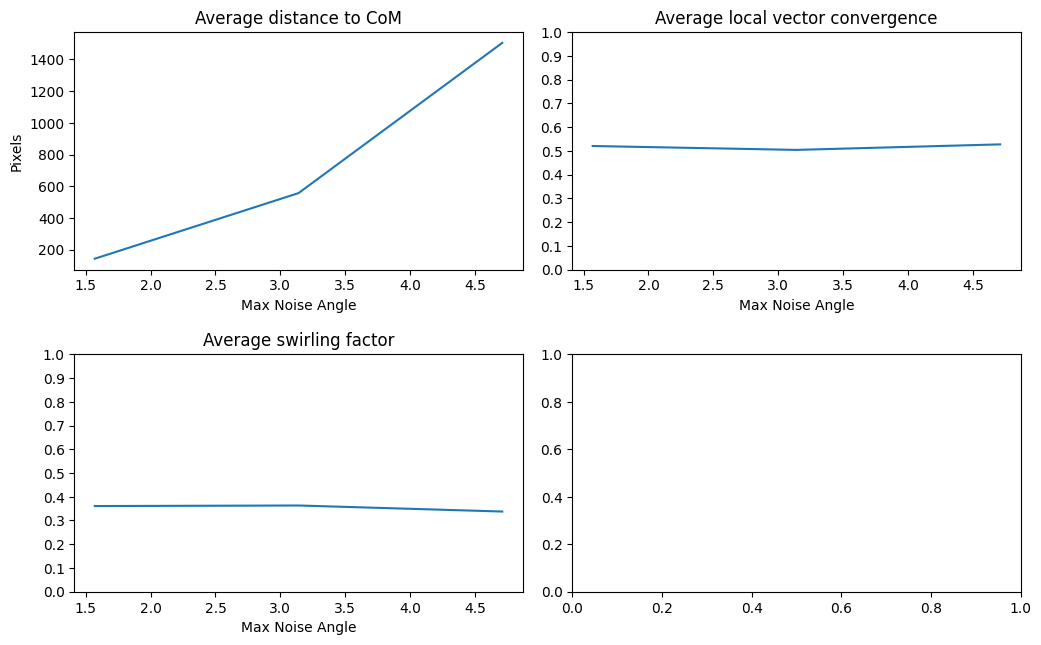

In [ ]:
draw_single_var_graphs("mna")

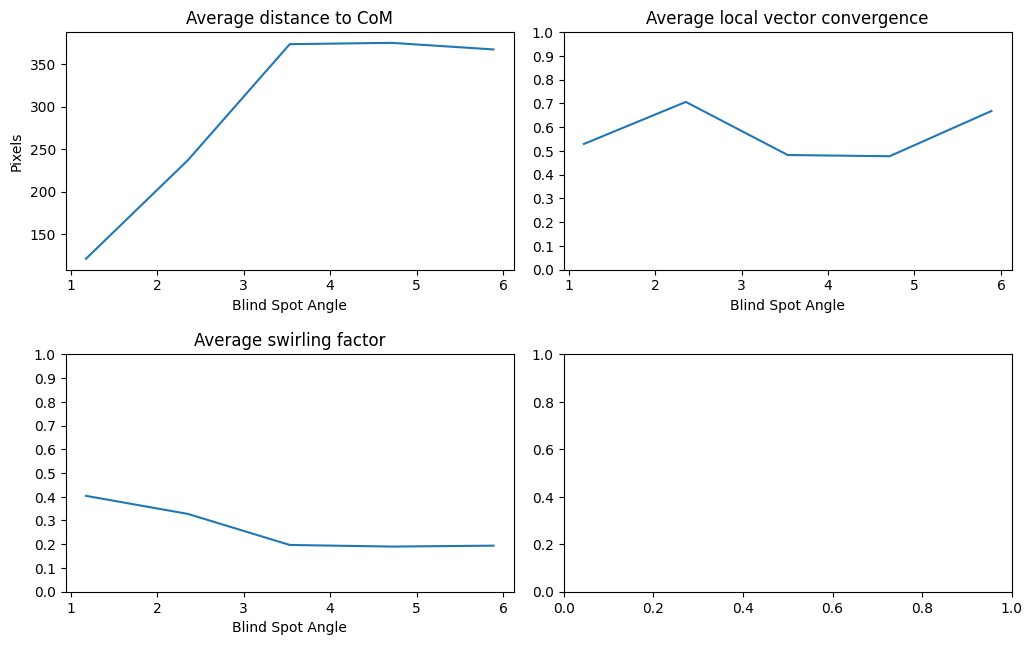

In [ ]:
draw_single_var_graphs("bsa")

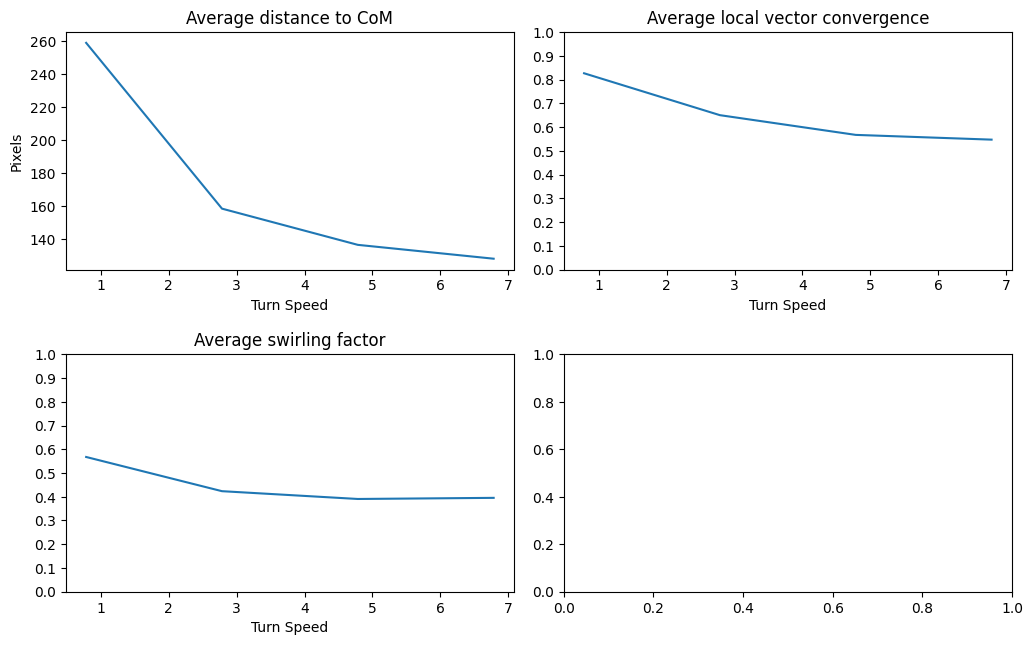

In [ ]:
draw_single_var_graphs("ts")

In [ ]:
from matplotlib.pyplot import tight_layout


def draw_double_var_graphs(name, other):
    fig = plt.figure(figsize=(10,10))
    fig.set_layout_engine(tight_layout(pad=20, h_pad=20))

    bsa_c = not (name == "blind_spot_angle" or  other == "blind_spot_angle") 
    mna_c = not (name == "max_noise_angle" or  other == "max_noise_angle") 
    ts_c =  not (name == "turn_speed" or  other == "turn_speed")


    subset = df[(df["blind_spot_angle_control"] == bsa_c) & (df["max_noise_angle_control"] == mna_c) & (df["turn_speed_control"] == ts_c)]
    
    ax = fig.add_subplot(2, 2, 1, projection='3d')
    ax.set_title("Average distance to CoM")
    ax.set_xlabel(readable_names[name])
    ax.set_ylabel(readable_names[other])

    ax.scatter(subset[name], subset[other], subset["avg_dist_to_com_avg"])

    ax = fig.add_subplot(2, 2, 2, projection='3d')

    ax.set_title("Average local vector convergence")
    ax.set_xlabel(readable_names[name])
    ax.set_ylabel(readable_names[other])

    ax.scatter(subset[name], subset[other], subset["local_vec_divergence_avg"])

    ax = fig.add_subplot(2, 2, 3, projection='3d')
    ax.set_xlabel(readable_names[name])
    ax.set_ylabel(readable_names[other])

    ax.set_title("Average swirling factor")
    ax.scatter(subset[name], subset[other], subset["swirling_factor_avg"])

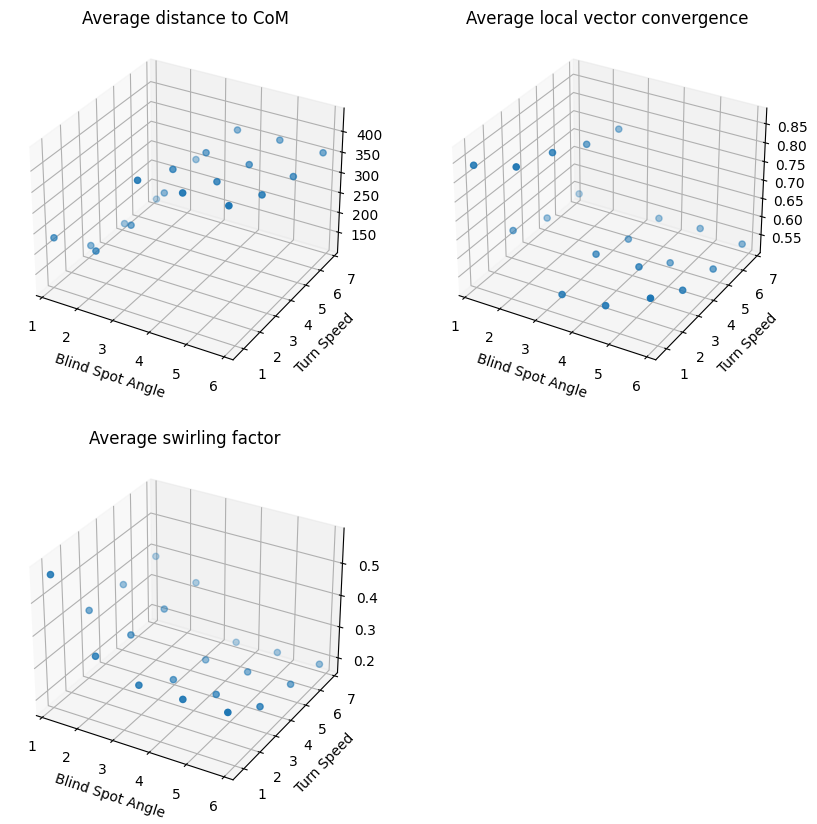

In [ ]:
draw_double_var_graphs("blind_spot_angle", "turn_speed")

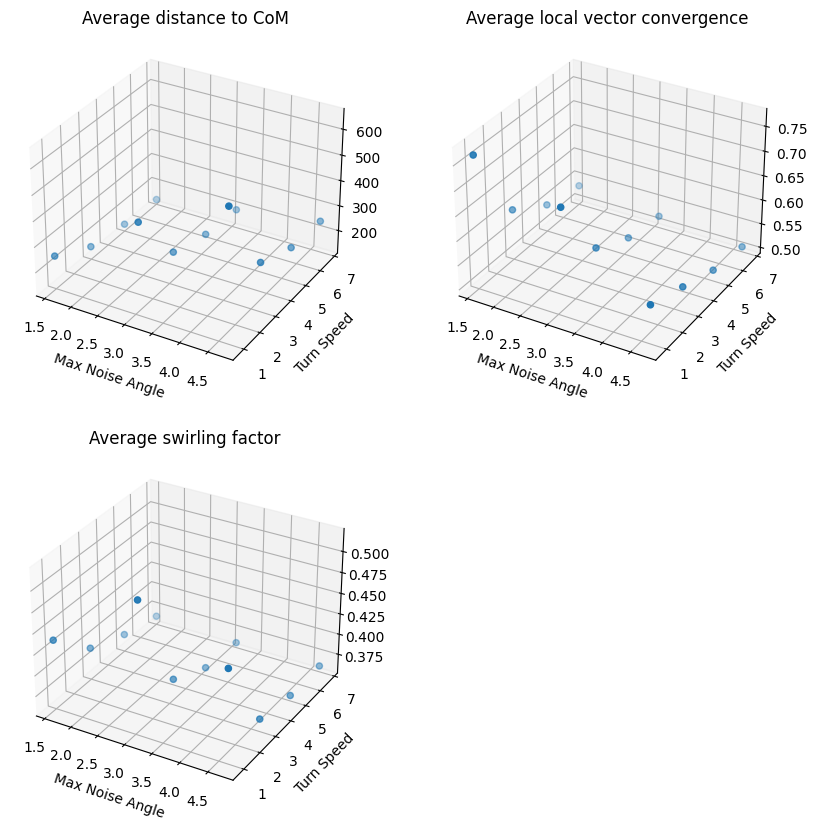

In [ ]:
draw_double_var_graphs("max_noise_angle", "turn_speed")

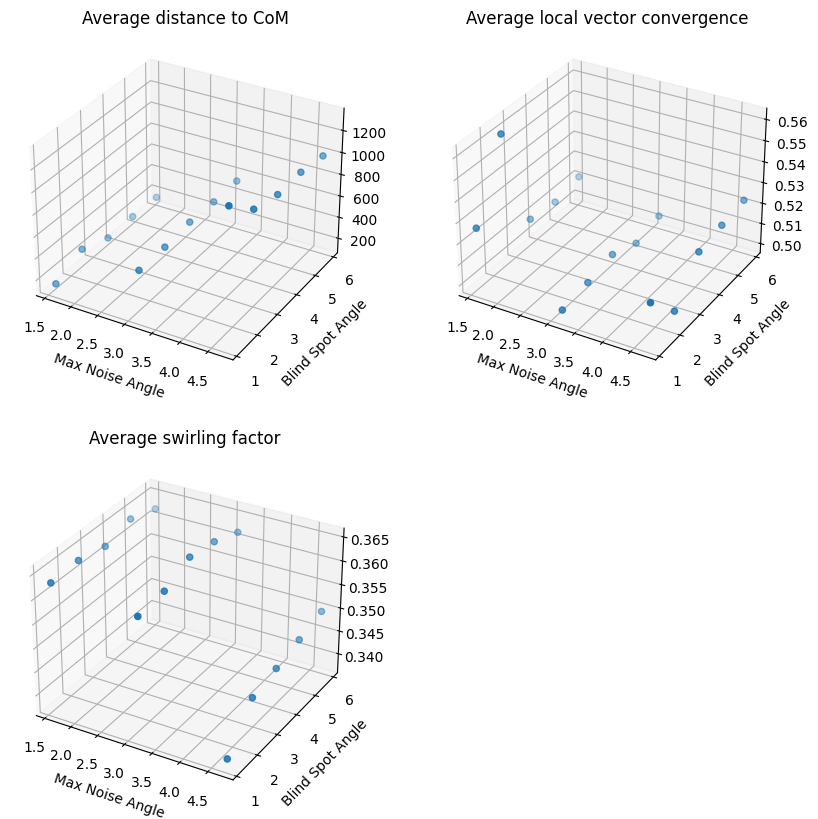

In [ ]:
draw_double_var_graphs("max_noise_angle", "blind_spot_angle")

In [ ]:
from matplotlib import cm
def four_d_graph():
    fig = plt.figure(figsize=(12,12))
    fig.set_layout_engine(tight_layout(pad=16, h_pad=16))


    subset = df[(df["blind_spot_angle_control"] == False) & (df["max_noise_angle_control"] == False) & (df["turn_speed_control"] == False)]
    
    ax = fig.add_subplot(2, 2, 1, projection='3d')
    ax.set_title("Average Distance to CoM")
    ax.set_xlabel("Blind Spot Angle (rads)")
    ax.set_ylabel("Turn Speed (rads / sec)")
    ax.set_zlabel("Max Noise Angle (rads)")

   

    scatter=ax.scatter(subset["blind_spot_angle"], subset["turn_speed"], subset["max_noise_angle"], c=subset["avg_dist_to_com_avg"],cmap=cm.viridis,s=20)
    legend1 = fig.legend(*scatter.legend_elements(num=5),
                                    loc="upper left", title="Distance")
    fig.add_artist(legend1)

    ax = fig.add_subplot(2, 2, 2, projection='3d')

    ax.set_title("Local Vector Convergence")
    ax.set_xlabel("Blind Spot Angle (rads)")
    ax.set_ylabel("Turn Speed (rads / sec)")
    ax.set_zlabel("Max Noise Angle (rads)")
    scatter=ax.scatter(subset["blind_spot_angle"], subset["turn_speed"],subset["max_noise_angle"] , c=subset["local_vec_divergence_avg"],cmap=cm.plasma )
    legend2 = fig.legend(*scatter.legend_elements(num=5),
                                    loc="upper right", title="Convergence")
    fig.add_artist(legend1)
    ax = fig.add_subplot(2, 2, 3, projection='3d')
    ax.set_title("Average Swirling Factor")
    ax.set_xlabel("Blind Spot Angle (rads)")
    ax.set_ylabel("Turn Speed (rads / sec)")
    ax.set_zlabel("Max Noise Angle (rads)")
    scatter=ax.scatter(subset["blind_spot_angle"], subset["turn_speed"], subset["max_noise_angle"], c=subset["swirling_factor_avg"],cmap=cm.inferno)
    legend3 = fig.legend(*scatter.legend_elements(num=5),
                                    loc="lower left", title="Swirling Factor")
    fig.add_artist(legend1)